# 特征相关性分析-信息增益率

In [2]:
import pandas as pd
import numpy as np
#定义计算信息熵的函数：计算Infor(D)
def infor(data):
    a = pd.value_counts(data) / len(data)
    return sum(np.log2(a) * a * (-1))

In [3]:
#定义计算信息增益的函数：计算g(D|A)
def g(data,str1,str2):
    e1 = data.groupby(str1).apply(lambda x:infor(x[str2]))
    p1 = pd.value_counts(data[str1]) / len(data[str1])
    #计算Infor(D|A)
    e2 = sum(e1 * p1)
    return infor(data[str2]) - e2

In [4]:
#定义计算信息增益率的函数：计算gr(D,A)
def gr(data,str1,str2):
    return g(data,str1,str2)/infor(data[str1])

In [5]:
data=pd.read_csv('jm1.csv')
data.columns = ["1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","bug"]
data.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,bug
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.001415,0.013493,0.003581,...,0.000592,0.512824,9.999995e-07,0.000144,0.000662,0.000554,0.001947,0.007272,0.000872,0.0
1,0.019934,0.008397,0.0,0.004977,0.007389,0.008045,0.018128,0.012789,0.093148,0.048741,...,0.023787,0.048790,7.880543e-04,0.014307,0.025440,0.022865,0.033092,0.044076,0.014090,1.0
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.001742,1.0
3,0.000000,0.002421,0.0,0.000000,0.002130,0.000000,0.000000,0.003182,0.017002,0.019723,...,0.002603,0.113329,2.199976e-05,0.001006,0.001654,0.003132,0.002920,0.024040,0.002902,0.0
4,0.004464,0.007247,0.0,0.000000,0.006377,0.007453,0.012121,0.008111,0.052846,0.026942,...,0.008259,0.086178,1.299916e-04,0.004358,0.010210,0.007170,0.018350,0.033496,0.007816,0.0


In [7]:
data['bug'].unique()

array([0., 1.])

In [8]:
features = ["1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21"]
lists = []
for feature in features:
    lists.append(gr(data,feature,'bug'))
print(lists)

[0.0601621661468061, 0.05630196212141019, 0.053612909411505726, 0.05771072786030058, 0.055468151812421165, 0.06136506877477696, 0.04705070551657243, 0.05915962660183275, 0.07676955659307783, 0.07027459836428165, 0.06808688988628514, 0.050559613492092814, 0.06240339867665852, 0.033336001285024786, 0.06809490273447473, 0.07497750099253994, 0.058867738257516906, 0.05909266440151001, 0.05598658096310969, 0.05235203624971291, 0.06473703464209518]


In [6]:
data1 = data.drop(labels=['bug'],axis=1)

In [10]:
IGR = pd.Series(lists)
IGR.index = data1.columns
IGR.sort_values(ascending=False)

9     0.076770
16    0.074978
10    0.070275
15    0.068095
11    0.068087
21    0.064737
13    0.062403
6     0.061365
1     0.060162
8     0.059160
18    0.059093
17    0.058868
4     0.057711
2     0.056302
19    0.055987
5     0.055468
3     0.053613
20    0.052352
12    0.050560
7     0.047051
14    0.033336
dtype: float64

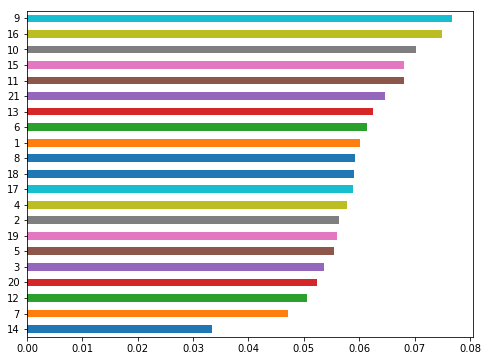

In [12]:
#let's plot the ordered mutual_info values per feature
import matplotlib.pyplot as plot
IGR.sort_values(ascending=True).plot.barh(figsize=(8, 6))

# 特征相关性分析-互信息

In [7]:
X_1 = data.drop(labels=['bug'], axis=1)
y_1 = data['bug']

In [14]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_1, y_1)
mutual_info

array([0.22751955, 0.19607155, 0.06505319, 0.13014143, 0.2117401 ,
       0.21640965, 0.08991106, 0.20220318, 0.07380011, 0.08612961,
       0.09887943, 0.14429658, 0.15987332, 0.10066734, 0.10245026,
       0.10329423, 0.18031461, 0.17366823, 0.21076346, 0.21118543,
       0.25980401])

In [15]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_1.columns
mutual_info.sort_values(ascending=False)

21    0.259804
1     0.227520
6     0.216410
5     0.211740
20    0.211185
19    0.210763
8     0.202203
2     0.196072
17    0.180315
18    0.173668
13    0.159873
12    0.144297
4     0.130141
16    0.103294
15    0.102450
14    0.100667
11    0.098879
7     0.089911
10    0.086130
9     0.073800
3     0.065053
dtype: float64

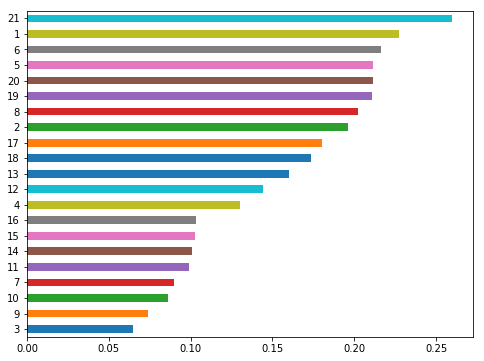

In [16]:
#let's plot the ordered mutual_info values per feature
import matplotlib.pyplot as plot
mutual_info.sort_values(ascending=True).plot.barh(figsize=(8, 6))

# 特征相关性分析-卡方值

In [17]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_1,y_1)
f_p_values

(array([ 7.69767244, 11.26124311,  5.76129473,  7.80364851, 10.33263003,
         8.78495352, 14.99046987,  7.10384263, 11.00010323,  6.68346669,
         2.47424529,  8.37602221,  9.75100819, 33.74142225,  2.47424222,
         8.37642771, 10.98719974,  9.01848255,  7.76407881,  2.51402095,
        10.29296124]),
 array([5.52920808e-03, 7.91421928e-04, 1.63829952e-02, 5.21408485e-03,
        1.30698836e-03, 3.03725304e-03, 1.08055502e-04, 7.69188744e-03,
        9.11068133e-04, 9.73111892e-03, 1.15724979e-01, 3.80203650e-03,
        1.79224395e-03, 6.29459842e-09, 1.15725206e-01, 3.80118831e-03,
        9.17433244e-04, 2.67263180e-03, 5.32954708e-03, 1.12837693e-01,
        1.33538614e-03]))

In [19]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_1.columns
p_values

1     5.529208e-03
2     7.914219e-04
3     1.638300e-02
4     5.214085e-03
5     1.306988e-03
6     3.037253e-03
7     1.080555e-04
8     7.691887e-03
9     9.110681e-04
10    9.731119e-03
11    1.157250e-01
12    3.802037e-03
13    1.792244e-03
14    6.294598e-09
15    1.157252e-01
16    3.801188e-03
17    9.174332e-04
18    2.672632e-03
19    5.329547e-03
20    1.128377e-01
21    1.335386e-03
dtype: float64

In [20]:
p_values.sort_index(ascending=False)

9     9.110681e-04
8     7.691887e-03
7     1.080555e-04
6     3.037253e-03
5     1.306988e-03
4     5.214085e-03
3     1.638300e-02
21    1.335386e-03
20    1.128377e-01
2     7.914219e-04
19    5.329547e-03
18    2.672632e-03
17    9.174332e-04
16    3.801188e-03
15    1.157252e-01
14    6.294598e-09
13    1.792244e-03
12    3.802037e-03
11    1.157250e-01
10    9.731119e-03
1     5.529208e-03
dtype: float64

# --------------------------------------------------------------------------------------------

In [8]:
del data['3']
del data['7']
del data['14']

In [9]:
data.head()

,1,2,4,5,6,8,9,10,11,12,13,15,16,17,18,19,20,21,bug
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001415,0.013493,0.003581,9.999995e-07,0.000000,0.000592,9.999995e-07,0.000144,0.000662,0.000554,0.001947,0.007272,0.000872,0.0
1,0.019934,0.008397,0.004977,0.007389,0.008045,0.012789,0.093148,0.048741,7.880543e-04,0.014309,0.023787,7.880543e-04,0.014307,0.025440,0.022865,0.033092,0.044076,0.014090,1.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.001742,1.0
3,0.000000,0.002421,0.000000,0.002130,0.000000,0.003182,0.017002,0.019723,2.199976e-05,0.001112,0.002603,2.199976e-05,0.001006,0.001654,0.003132,0.002920,0.024040,0.002902,0.0
4,0.004464,0.007247,0.000000,0.006377,0.007453,0.008111,0.052846,0.026942,1.299916e-04,0.004443,0.008259,1.299916e-04,0.004358,0.010210,0.007170,0.018350,0.033496,0.007816,0.0


In [10]:
X = data.drop(labels=['bug'], axis=1)
y = data['bug']

# 特征相关性分析阶段

In [11]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#Symmetrical Uncertainty
#entropy
from scipy.stats import entropy
import numpy as np
#Joint Entropy
def jEntropy(Y,X):
    YX = np.c_[Y,X]
    return entropy(YX)

#conditional entropy
def cEntropy(Y, X):
    return jEntropy(Y, X) - entropy(X)

#SU
def symmetricalUncertain(Y,X):
    n = float(y.shape[0])
    vals = np.unique(Y)
    # Computing Entropy for the feature x. 
    Hx = entropy(X)
    # Computing Entropy for the feature y.
    Hy = entropy(Y)
    #Computing Joint entropy between x and y.
    Hxy = jEntropy(Y,X)
    IG = Hx-Hxy
    return 2*IG/(Hx+Hy)

In [45]:
top_n1 =[]
for i in X.columns.values:
    X[i]=X[i].astype('float64')
    top_n1.append(symmetricalUncertain(X[i],X["18"]))
# print (top_n1)
top_n2=[row[1] for row in top_n1]
print (top_n2)

col_name1 = np.array(X.columns)
a1 = pd.DataFrame(top_n2)
b1 = pd.DataFrame(col_name1)
info3 = pd.concat([a1,b1], axis=1)
info3.columns = ['Score','Features']
# info3

[7.377487584029819e-15, 7.380029914043255e-15, 7.7609105795403e-15, 7.396507408889684e-15, 7.479058192754908e-15, 7.372569808643253e-15, 7.183308970534568e-15, 7.213836967135274e-15, 8.477328424389014e-15, 7.513068011805662e-15, 7.397661565366375e-15, 8.477327407574802e-15, 7.512834403592938e-15, 7.400137103892548e-15, 7.399096548592291e-15, 7.25179647310575e-15, 7.112202689418225e-15, 7.266497217557525e-15]


In [46]:
SU = pd.Series(top_n2)
SU.index = X.columns
SU.sort_values(ascending=False)

11    8.477328e-15
15    8.477327e-15
4     7.760911e-15
12    7.513068e-15
16    7.512834e-15
6     7.479058e-15
17    7.400137e-15
18    7.399097e-15
13    7.397662e-15
5     7.396507e-15
2     7.380030e-15
1     7.377488e-15
8     7.372570e-15
21    7.266497e-15
19    7.251796e-15
10    7.213837e-15
9     7.183309e-15
20    7.112203e-15
dtype: float64

In [40]:
corr_features = ["6","5","8","9","20","18","19","10","13"]
data2=data.drop(corr_features,axis=1)
data2.head()

,1,2,4,7,11,12,15,17,21,bug
0,1.609438,0.693147,0.693147,0.512824,0.000000,0.512824,0.000000,1.386294,0.693147,0.0
1,3.440424,0.845543,0.782293,0.098336,0.078987,4.956367,1.233898,2.502505,2.190275,1.0
2,3.395635,1.386294,1.386294,0.079520,0.110839,5.463206,0.986052,2.604675,1.791759,1.0
3,2.890372,1.098612,1.098612,0.113329,0.048790,4.214643,0.693147,2.397895,1.386294,0.0
4,1.098612,0.693147,0.693147,0.693147,0.000000,0.231112,0.000000,1.098612,0.693147,0.0


In [41]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop("bug",axis=1),
    data2["bug"],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((650, 9), (279, 9))

In [45]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import f1_score,roc_auc_score
SVM = LinearSVC()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
#SVM.score(X_test,y_test)
f1_score1 = f1_score(y_test,y_pred)
roc_auc_score1 = roc_auc_score(y_test,y_pred)
print(f1_score1)
print(roc_auc_score1)

0.7588652482269502
0.7562435765673176
